## SVR

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('data\la-haute-borne-data-2017-2020.csv',delimiter = ";")
selected_columns = data[["Date_time","DCs_avg"]]
new_df = selected_columns.copy()

In [3]:
# Set datetime
from datetime import datetime

new_df['Date_time'] = pd.to_datetime(data['Date_time'])
new_df['Date_time'] = pd.to_datetime(new_df['Date_time'], utc=True)

In [4]:
# Set index
#new_df.set_index('Date_time', inplace = True)


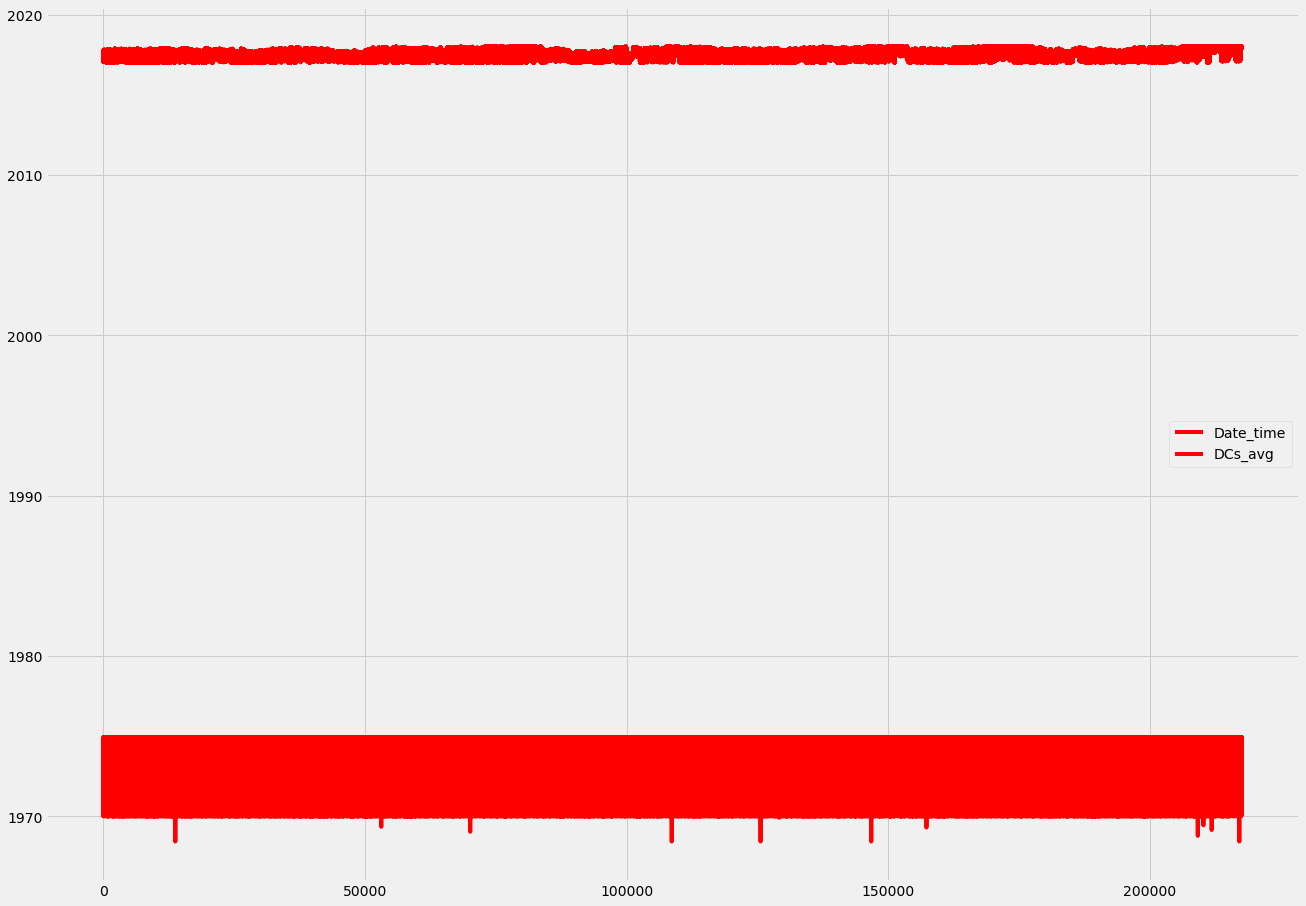

In [5]:
#plot

plot.style.use('fivethirtyeight')
new_df.plot(figsize=(20,15), color='red')
plot.show()

In [6]:
#ARIMA model:

import statsmodels
import statsmodels.api as sm


In [28]:
# Fit an MA(1) model to the first simulated data
#model = sm.tsa.arima.ARIMA(new_df, order=(1,1,2))
#res = model.fit()


# Print out summary information on the fit
#print(res.summary())

# Print out the estimate for the constant and for theta
#print(res.params)

In [8]:
#from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(new_df,order=(1,1,1)) 
# fit model
model_fit = model.fit()  
print(model_fit.summary())



In [9]:
new_df.head()

,Date_time,DCs_avg
0,2017-02-08 07:00:00+00:00,38.369999
1,2017-01-26 01:40:00+00:00,1204.140000
2,2017-01-26 12:50:00+00:00,1179.860000
3,2017-01-26 14:00:00+00:00,1198.470000
4,2017-02-18 00:10:00+00:00,159.840000


In [10]:
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
st_y = StandardScaler()

X = st_x.fit_transform(new_df[['Date_time']])
Y = st_y.fit_transform(new_df[['DCs_avg']])

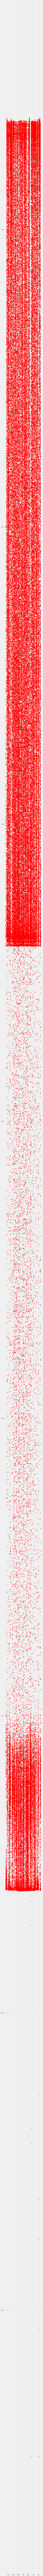

In [11]:
fig = plot.figure()
ax = fig.add_axes([100,0,1,100])
ax.scatter(X,Y,color='r')

In [12]:
from sklearn.svm import SVR


In [13]:
# change NaN to 0
x = data['Ws_avg'].fillna(0)
x = data['Ot_avg'].fillna(0)
x = data['Rt_avg'].fillna(0)
y = data['P_avg'].fillna(0)


In [14]:
# get test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 23)
# reshape to 2d
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_test = x_train.reshape(-1,1)
y_test = y_train.reshape(-1,1)

In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = y_train.reshape(len(y_train), 1)
y_train = sc_y.fit_transform(y_train)

In [16]:
from sklearn.svm import LinearSVR
svr = LinearSVR( random_state = 25)

In [17]:
svr.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVR(random_state=25)

In [18]:
y_pred = sc_y.inverse_transform(svr.predict(sc_x.transform(x_test)))
y_pred

array([156.5087732 , 160.16193924, 141.85957736, ..., 214.9594299 ,
       123.6302788 , 232.9330072 ])

In [19]:
y_pred_vert = y_pred.reshape(len(y_pred), 1)
y_pred_vert = np.round(y_pred_vert)
y_true_vert = y_test.reshape(len(y_test), 1)
y_true_vert = np.round(y_true_vert)

In [21]:
# not really good?
true_pred = np.concatenate((y_true_vert, y_pred_vert), axis = 1)

first20 = true_pred[0:20]
first20

array([[ 2.330e+02,  1.570e+02],
       [ 0.000e+00,  1.600e+02],
       [ 1.560e+02,  1.420e+02],
       [ 4.560e+02,  1.600e+02],
       [ 0.000e+00,  1.750e+02],
       [-1.000e+00,  1.780e+02],
       [ 1.380e+03,  2.060e+02],
       [ 3.430e+02,  1.970e+02],
       [ 5.120e+02,  1.820e+02],
       [ 3.430e+02,  1.710e+02],
       [ 2.240e+02,  1.350e+02],
       [ 6.630e+02,  1.600e+02],
       [ 0.000e+00,  1.490e+02],
       [ 5.130e+02,  1.930e+02],
       [ 1.794e+03,  1.750e+02],
       [ 2.570e+02,  1.510e+02],
       [ 1.660e+02,  2.150e+02],
       [ 7.650e+02,  1.860e+02],
       [ 6.700e+01,  1.710e+02],
       [ 0.000e+00,  2.220e+02]])

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

310.7130749739107

In [24]:
# overestimating?
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

-0.13377087381814978